In [4]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#ignore harmless warning
import warnings
warnings.filterwarnings('ignore')


In [6]:
#list of seaborn datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [7]:
# import penguin data set
data = sns.load_dataset('penguins')

#data Dimensions
data.shape

print(f'The data has {data.shape[0]} rows and {data.shape[1]} colums.')

The data has 344 rows and 7 colums.


In [8]:
# data sample
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [9]:
# missing value check
round(data.isnull().mean()*100,2)

,0
species,0.00
island,0.00
bill_length_mm,0.58
bill_depth_mm,0.58
flipper_length_mm,0.58
body_mass_g,0.58
sex,3.20


In [10]:
# remove all the missing value for simplicity
data.dropna(inplace=True)

# missing value check
round(data.isnull().mean()*100,2)


,0
species,0.0
island,0.0
bill_length_mm,0.0
bill_depth_mm,0.0
flipper_length_mm,0.0
body_mass_g,0.0
sex,0.0


In [11]:
# correlation b/w flipper_length_mm	 and body_mass_g

# correlation coeficient value (pearson)
#synt
# var = data['x'].corr(data['y'])

s_corr = data['flipper_length_mm'].corr(data['body_mass_g']) # numarical representaion

print(s_corr)

0.872978898565361


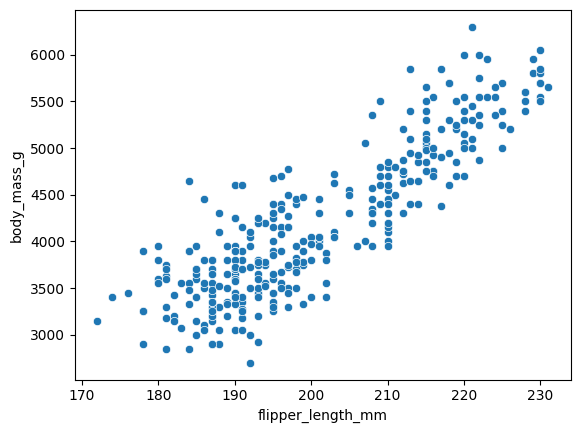

In [12]:
# Scatter plot for correlation b/w flipper_length_mm	 and body_mass_g

sns.scatterplot(data=data,
                x='flipper_length_mm',
                y='body_mass_g')
plt.show()

In [13]:
num_cols = [cols for cols in data.columns if data[cols].dtype != 'O']

for x in num_cols:
  for y in num_cols:
    print(x,"----",y)

bill_length_mm ---- bill_length_mm
bill_length_mm ---- bill_depth_mm
bill_length_mm ---- flipper_length_mm
bill_length_mm ---- body_mass_g
bill_depth_mm ---- bill_length_mm
bill_depth_mm ---- bill_depth_mm
bill_depth_mm ---- flipper_length_mm
bill_depth_mm ---- body_mass_g
flipper_length_mm ---- bill_length_mm
flipper_length_mm ---- bill_depth_mm
flipper_length_mm ---- flipper_length_mm
flipper_length_mm ---- body_mass_g
body_mass_g ---- bill_length_mm
body_mass_g ---- bill_depth_mm
body_mass_g ---- flipper_length_mm
body_mass_g ---- body_mass_g


In [14]:
# corr coeff for entire dataframe
data.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


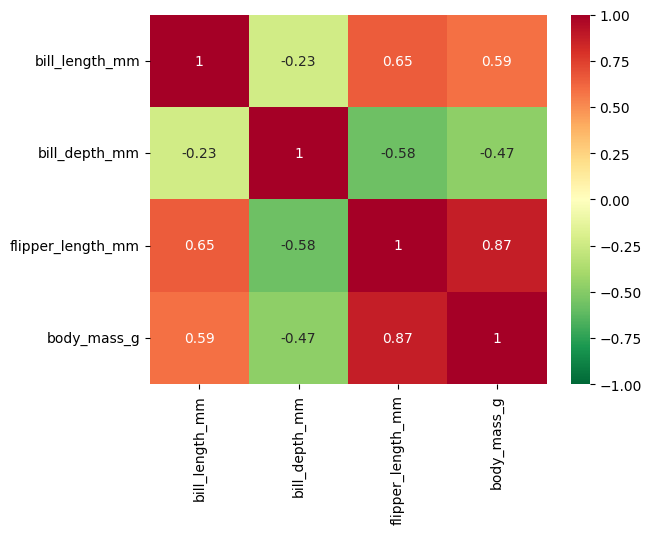

In [15]:
# Heatmap for easy correlation visual
sns.heatmap(data.corr(numeric_only=True),
            annot=True,
            cmap='RdYlGn_r',
            vmin=-1,
            vmax=1)

# from matplotlib import colormaps
# list(colormaps)

plt.show()

In [16]:
# heatmap by masking the duplicates of correlation value
# Masking

cor = data.corr(numeric_only=True)
upper = np.triu(cor) # triu : trim upper, tril : trim lower

upper

array([[ 1.        , -0.22862564,  0.65309564,  0.58945111],
       [ 0.        ,  1.        , -0.5777917 , -0.47201566],
       [ 0.        ,  0.        ,  1.        ,  0.8729789 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [17]:
np.bool(upper)

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

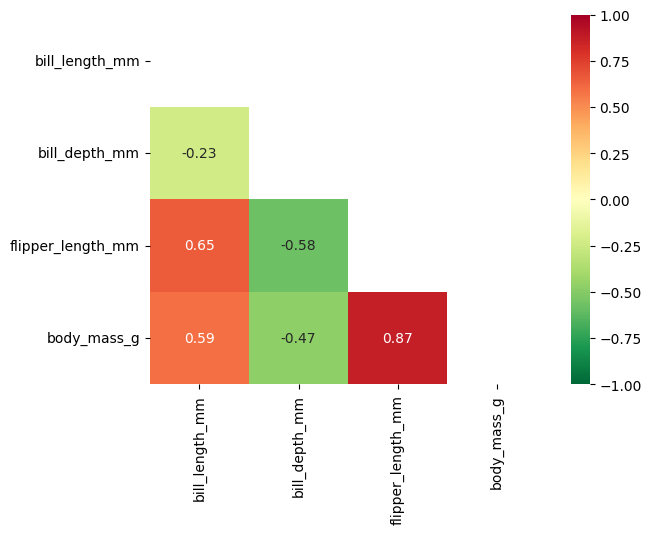

In [18]:
# heatmap by masking the duplicates of correlation value
# Masking

cor = data.corr(numeric_only=True)
upper = np.triu(cor) # triu : trim upper, tril : trim lower

# Heatmap
sns.heatmap(data.corr(numeric_only=True),
            annot=True,
            cmap='RdYlGn_r',
            vmin=-1,
            vmax=1,
            mask=upper)

plt.show()

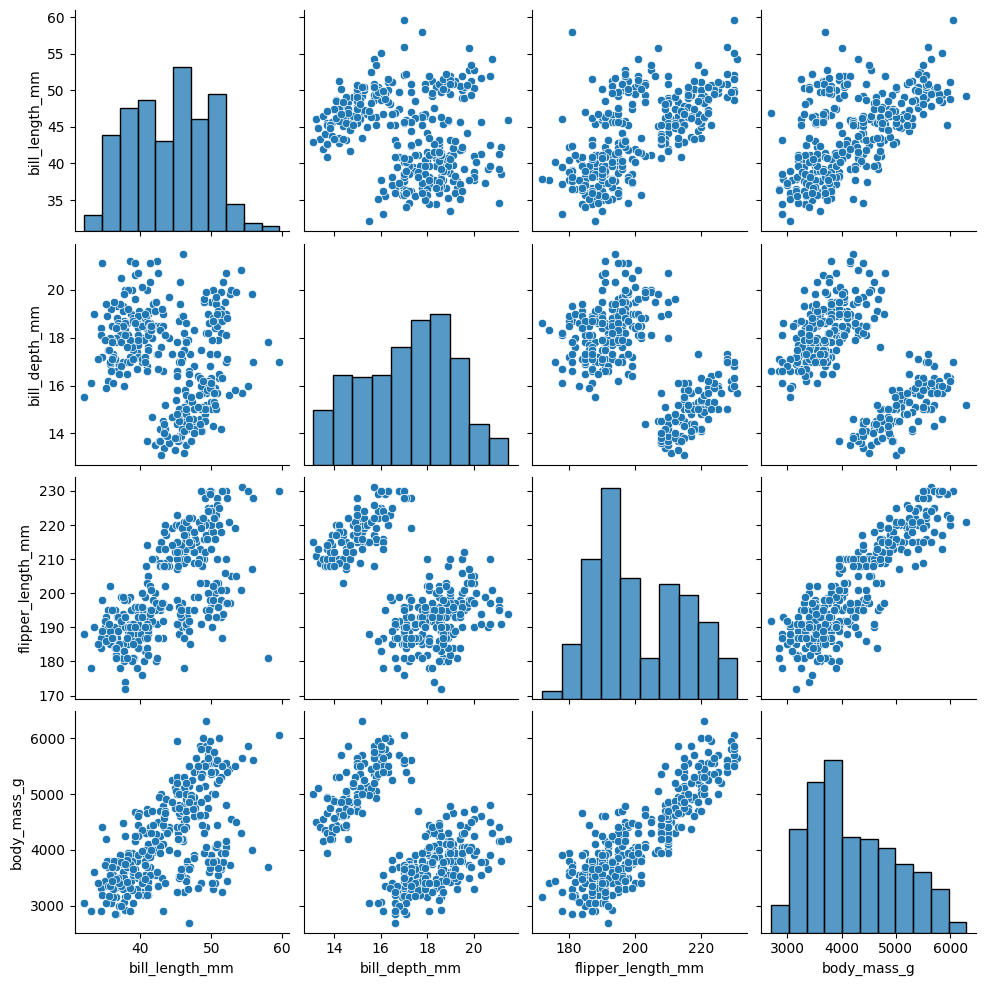

In [19]:

sns.pairplot(data)

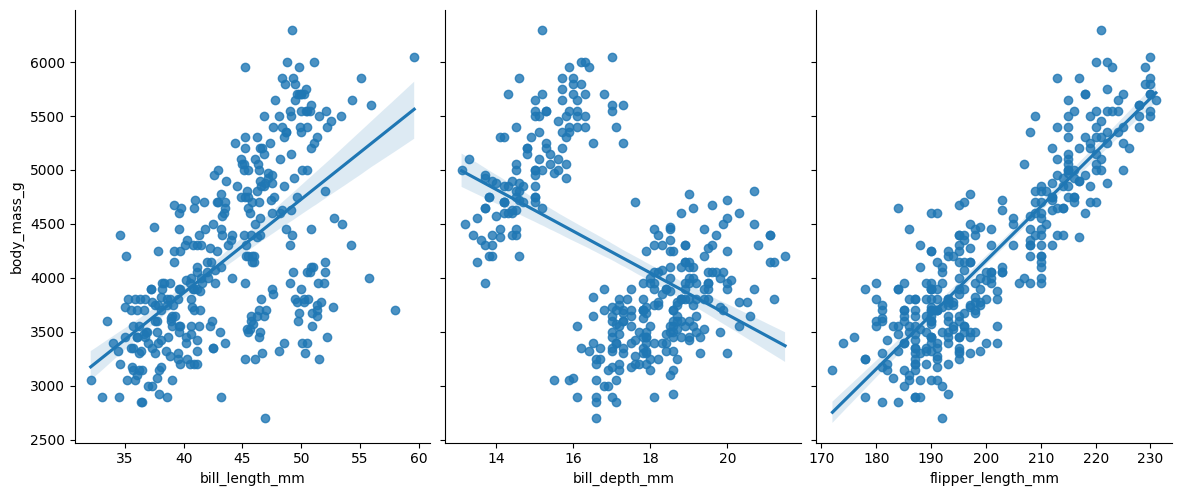

In [20]:
# What happens to body_mass_g against all other numerical variable

sns.pairplot(data,
             x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars=['body_mass_g'],
             height=5,
             aspect=0.8,
             kind='reg') # reg : regression

In [21]:
# list of unique categorical columns
for cols in data.columns:
  if data[cols].dtype == 'O':
    print(cols,':',data[cols].unique())

species : ['Adelie' 'Chinstrap' 'Gentoo']
island : ['Torgersen' 'Biscoe' 'Dream']
sex : ['Male' 'Female']


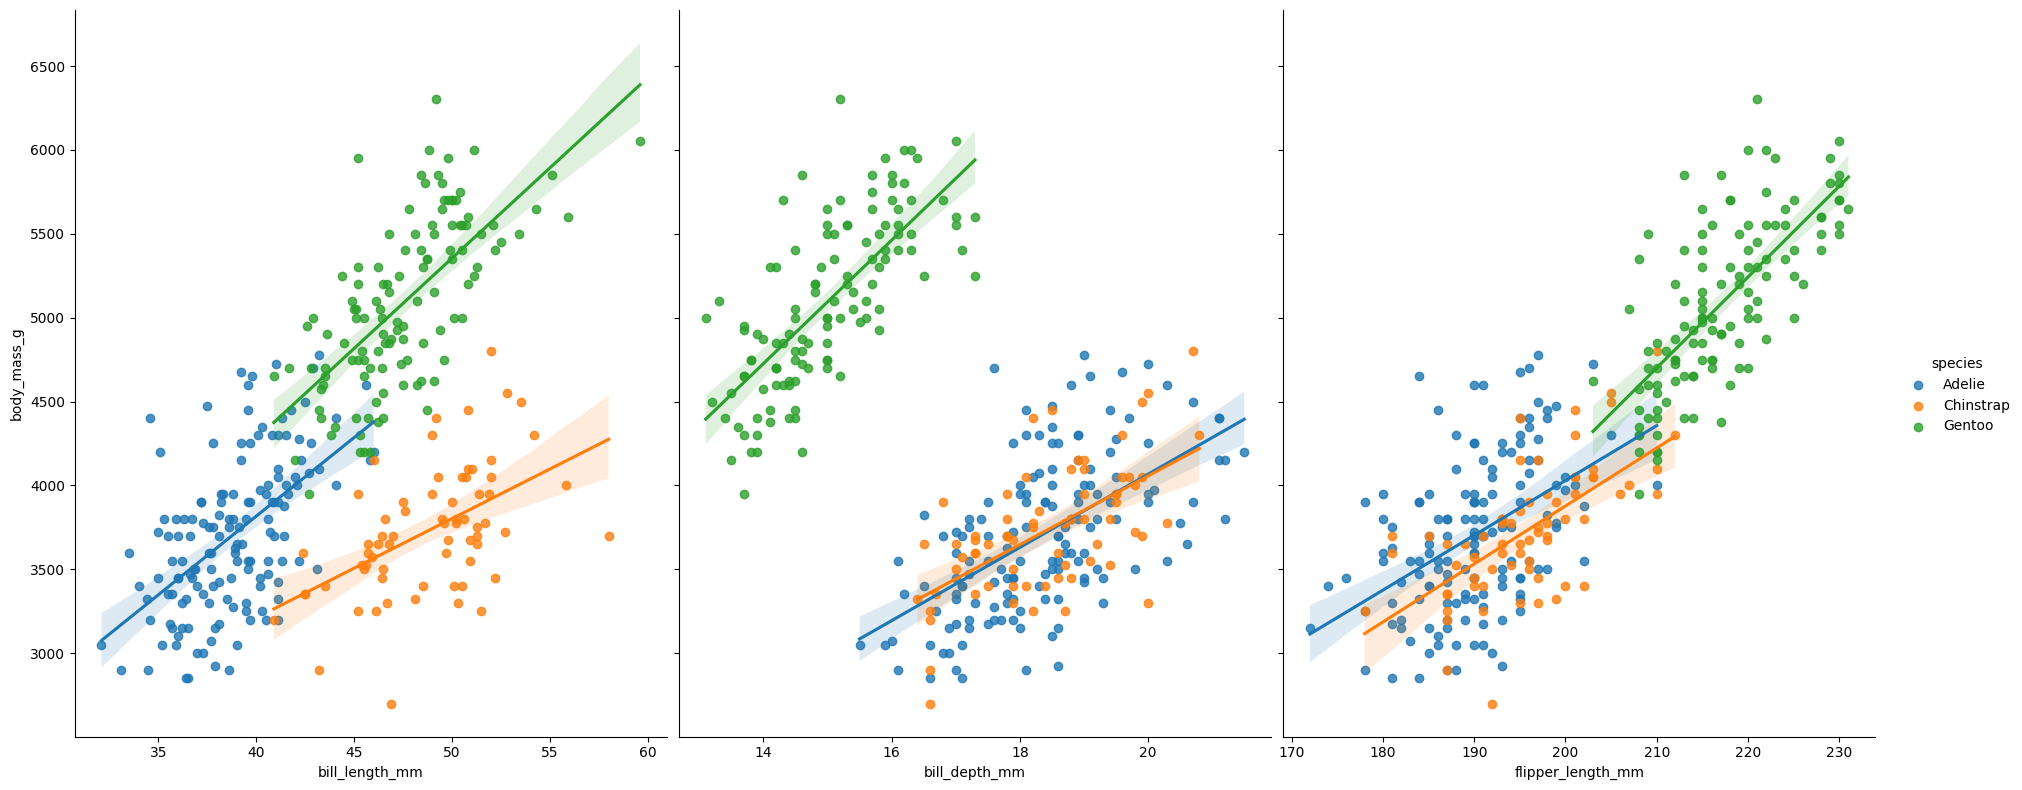

In [22]:
# Lets analyse the above pairplot with respect to hue (categorical column)
sns.pairplot(data,
             x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars=['body_mass_g'],
             hue='species',
             height=8,
             aspect=0.8,
             kind='reg'
             )

In [23]:
# THE ABOVE BEHAVIOUR IS CALLED AS SIMPSON'S PARADOX



# correlation of each species for bill_depth vs body_mass
print('Overall Correlation between bill_depth and body_mass:', round(data['bill_depth_mm'].corr(data['body_mass_g']), 2))

for species in data['species'].unique():
  s_df = data[data['species'] == species]
  s_corr = s_df['bill_depth_mm'].corr(s_df['body_mass_g'])
  print(f'Correlation B/W bill_depth_mm and body_mass_g {species} species:{s_corr}')



Overall Correlation between bill_depth and body_mass: -0.47
Correlation B/W bill_depth_mm and body_mass_g Adelie species:0.5801560058681456
Correlation B/W bill_depth_mm and body_mass_g Chinstrap species:0.6044982582238205
Correlation B/W bill_depth_mm and body_mass_g Gentoo species:0.7229671988135823


In [24]:
g_data = data[data['species']=='Gentoo']
round(g_data['bill_depth_mm'].corr(data['body_mass_g']),2)

np.float64(0.72)

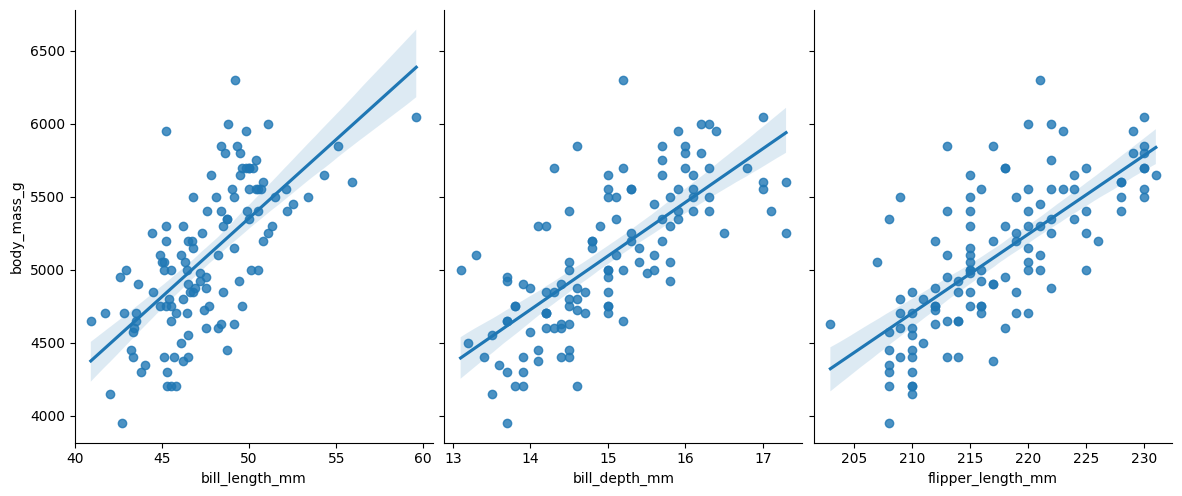

In [25]:
# understand body_mass vs other numerical columns only for gento species using pairplot

sns.pairplot(data=data[data['species']=='Gentoo'],
             x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars=['body_mass_g'],
             height=5, aspect=0.8, kind='reg')   # reg : regression

plt.show()

In [26]:
# 1. body_mass_g against all other numerical features with island as hue
# 2. body_mass_g against all other numerical features for species (hue) in Biscoe Island
# 3. loops to identify the combination of island and species (island : [species])

In [27]:
# # Code Block
# tips = sns.load_dataset('tips')
# tips.head()

In [28]:
# 4. Use tips data and find out correlation for all numerical values
# 5. Try combination of numerical values with respect to hue
# 6. find if there is any Simpson paradox pattern in the tips data

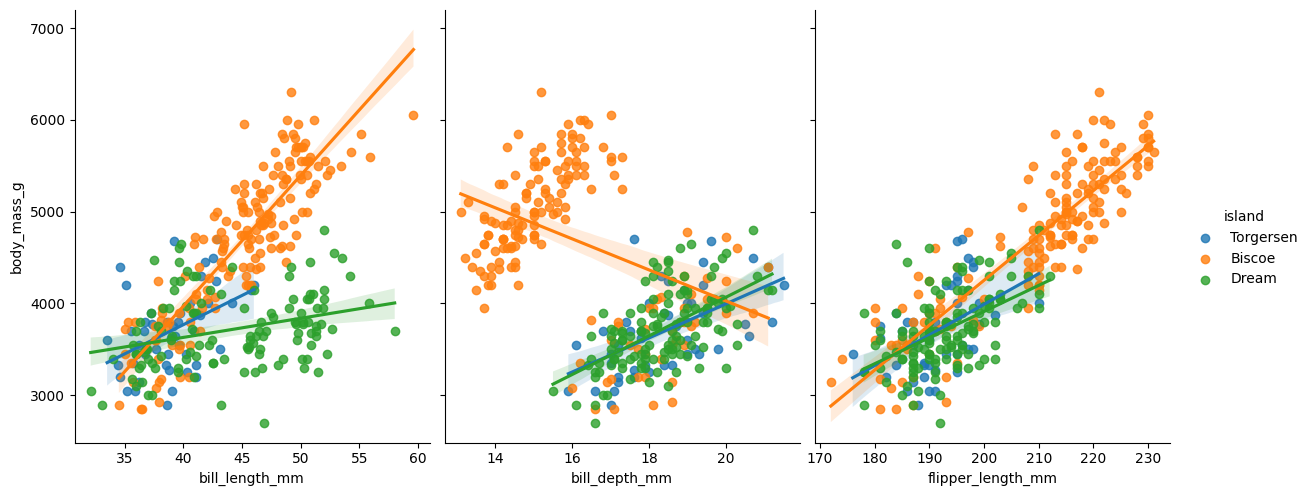

In [33]:
# 1. body_mass_g against all other numerical features with island as hue

sns.pairplot(data,
             x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars=['body_mass_g'],
             hue = 'island',
             height=5, aspect=0.8, kind='reg')   # reg : regression

plt.show()

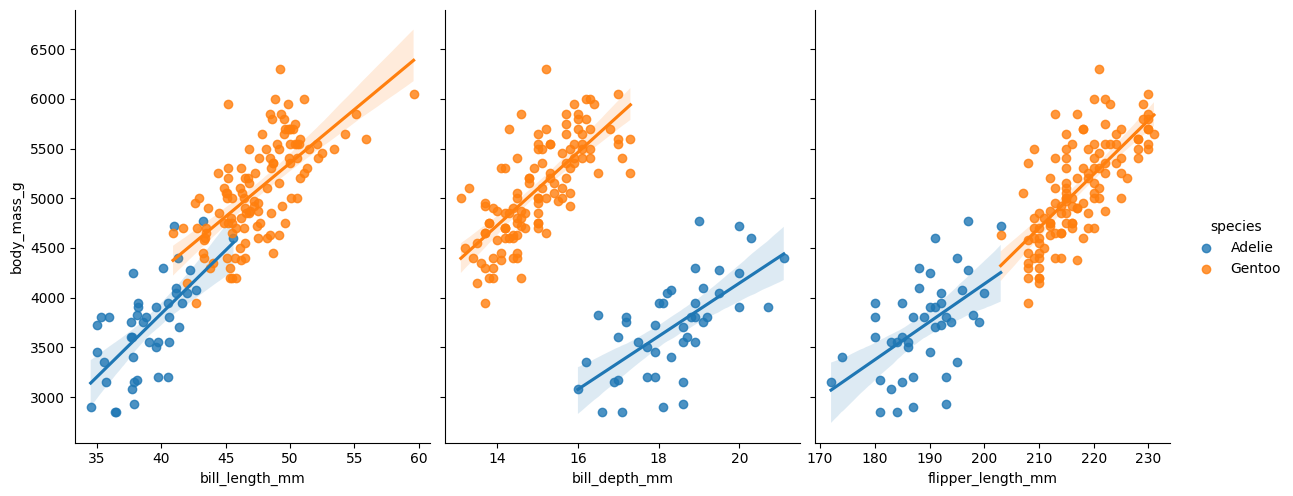

In [37]:
# 2. body_mass_g against all other numerical features for species (hue) in Biscoe Island

sns.pairplot(data = data[data['island']=='Biscoe'],
             x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars='body_mass_g',
             hue='species',
             height=5, aspect=0.8, kind='reg')

In [44]:
# 3. loops to identify the combination of island and species (island : [species])

for i in data['island'].unique():
  print(i,":",data[data['island']==i]['species'].unique())

Torgersen : ['Adelie']
Biscoe : ['Adelie' 'Gentoo']
Dream : ['Adelie' 'Chinstrap']


In [46]:
# Import tips data
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


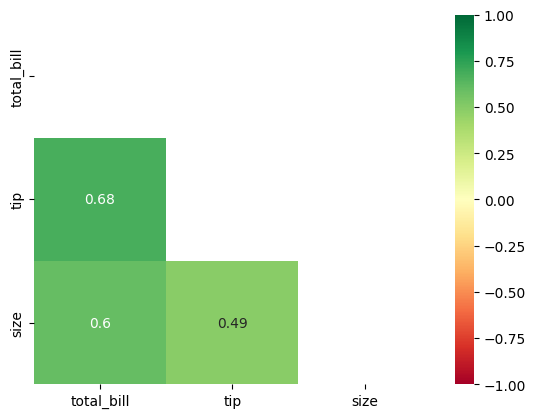

In [50]:
# 4. Use tips data and find out correlation for all numerical values
sns.heatmap(tips.corr(numeric_only=True),
            annot=True,
            cmap='RdYlGn',
            vmin=-1,
            vmax=1,
            mask=np.triu(tips.corr(numeric_only=True)))

plt.show()

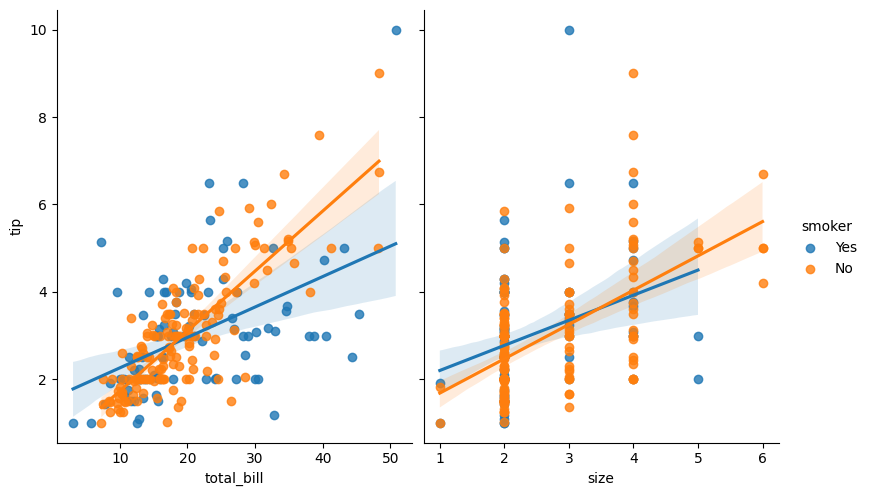

In [49]:
# 5. Try combination of numerical values with respect to hue

sns.pairplot(tips,
             x_vars=['total_bill', 'size'],
             y_vars=['tip'],
             height=5,
             aspect=0.8,
             kind='reg',
             hue='smoker')  # sex, day, time

plt.show()

In [ ]:
# 6. find if there is any Simpson paradox pattern in the tips data

## -- No Simpson Paradox